# Project: Predicting autism diagnosis from fMRI data

In [81]:
#import librairies
import os
import pandas as pd
import nibabel as nib
import nilearn as nl
import seaborn as sns
from nilearn import plotting as nlp
from nilearn import datasets
import matplotlib.pyplot as plt
import numpy as np

import plotly
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
from chart_studio import tools
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Data exploration with static plotting

In [3]:
data=nl.datasets.fetch_abide_pcp()

/home/anproulx/miniconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning:

Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.



In [5]:
data.keys()
#len(data.func_preproc) 

dict_keys(['description', 'phenotypic', 'func_preproc'])

In [37]:
pheno=pd.DataFrame(data.phenotypic)
phen=pheno.drop("Unnamed_0", axis=1)

phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID  DX_GROUP  DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'         1          1   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'         1          1   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'         1          1   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'         1          1   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'         1          1   

   AGE_AT_SCAN  SEX  ... qc_notes_rater_1  qc_anat_rater_2  \
0        24.45    1  ...              b''            b'OK'   
1        19.09    1  ...              b''            b'OK'   
2        13.73    2  ...              b''            b'OK'   
3        13.37    1  ...              b''            b'OK'   
4        17.78    1  ...              b''            b'OK'   

   qc_anat_notes_rater_2  qc_func_rater_2          qc_func_notes_rater_2  \
0                    b''            b'OK'                            b''   
1                    b''            b'OK'                            b''   
2                    b''         b'maybe'      b'ic-parietal-cerebellum'   
3                    b''         b'maybe'          b'ic-parietal slight'   
4                    b''         b'maybe'  b'ic-cerebellum_temporal_lob'   

  qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
0           b'OK'                   b''           b'OK'   
1           b'OK'                   b''           b'OK'   
2           b'OK'                   b''           b'OK'   
3           b'OK'                   b''           b'OK'   
4           b'OK'                   b''           b'OK'   

   qc_func_notes_rater_3  SUB_IN_SMP  
0                    b''           1  
1                    b''           1  
2                    b''           0  
3                    b''           1  
4                    b''           1  

[5 rows x 105 columns]

In [38]:
#replace encoded values with labels

pheno_lab= phen["DX_GROUP"].replace([1 , 2], ["autism", "control"]) #1 is autism, 2 is control
phen["DX_GROUP"]=pheno_lab

pheno_lab= phen["SEX"].replace([1 , 2], ["male", "female"]) #1 is male, 2 is female
phen["SEX"]=pheno_lab

pheno_lab= phen["DSM_IV_TR"].replace([0 , 1 , 2 , 3 , 4 , -9999], ["control", "autism" , "asperger" , "PPD-NOS", "Asperger or PPD-NOS", "NaN"]) #O is control, 1 is autism, 2 is Asperger, 3 is PPD-NOS, 4 is Asperger or PPD-NOS
phen["DSM_IV_TR"]=pheno_lab

phen.head()

i  SUB_ID  X  subject  SITE_ID          FILE_ID DX_GROUP DSM_IV_TR  \
0  1   50003  2    50003  b'PITT'  b'Pitt_0050003'   autism    autism   
1  2   50004  3    50004  b'PITT'  b'Pitt_0050004'   autism    autism   
2  3   50005  4    50005  b'PITT'  b'Pitt_0050005'   autism    autism   
3  4   50006  5    50006  b'PITT'  b'Pitt_0050006'   autism    autism   
4  5   50007  6    50007  b'PITT'  b'Pitt_0050007'   autism    autism   

   AGE_AT_SCAN     SEX  ... qc_notes_rater_1  qc_anat_rater_2  \
0        24.45    male  ...              b''            b'OK'   
1        19.09    male  ...              b''            b'OK'   
2        13.73  female  ...              b''            b'OK'   
3        13.37    male  ...              b''            b'OK'   
4        17.78    male  ...              b''            b'OK'   

   qc_anat_notes_rater_2  qc_func_rater_2          qc_func_notes_rater_2  \
0                    b''            b'OK'                            b''   
1                    b''            b'OK'                            b''   
2                    b''         b'maybe'      b'ic-parietal-cerebellum'   
3                    b''         b'maybe'          b'ic-parietal slight'   
4                    b''         b'maybe'  b'ic-cerebellum_temporal_lob'   

  qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
0           b'OK'                   b''           b'OK'   
1           b'OK'                   b''           b'OK'   
2           b'OK'                   b''           b'OK'   
3           b'OK'                   b''           b'OK'   
4           b'OK'                   b''           b'OK'   

   qc_func_notes_rater_3  SUB_IN_SMP  
0                    b''           1  
1                    b''           1  
2                    b''           0  
3                    b''           1  
4                    b''           1  

[5 rows x 105 columns]

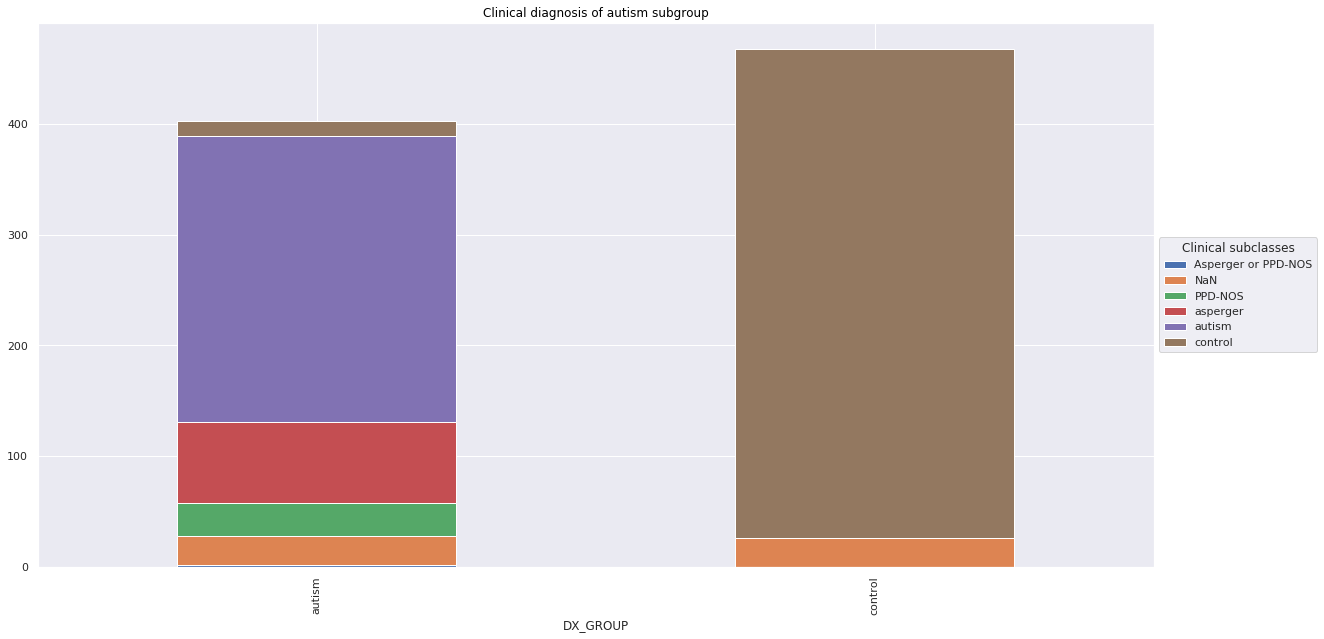

In [26]:
#clinical sub-classes of subjects classified as autistic
sns.set()

pd.crosstab(index=phen['DX_GROUP'],
                columns=phen['DSM_IV_TR']).plot.bar(stacked=True)

plt.title('Clinical diagnosis of autism subgroup', color='black')
plt.legend(title='Clinical subclasses', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().set_size_inches(20, 10)

/home/anproulx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



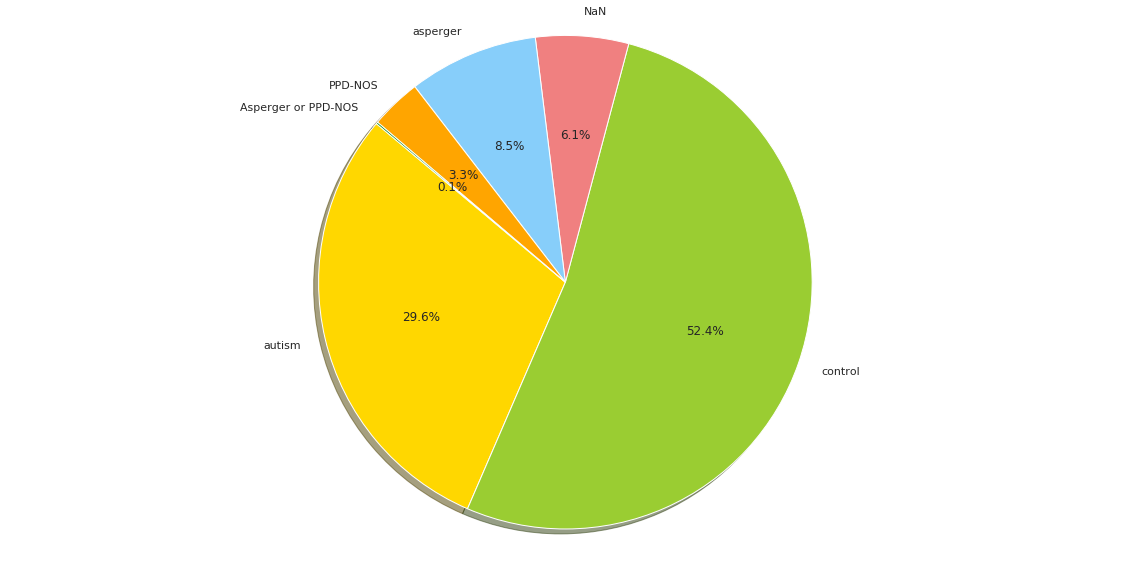

In [28]:
# Data to plot
sns.set()
labels = phen["DSM_IV_TR"].drop_duplicates()
#print(labels)

size=pd.DataFrame(phen["DSM_IV_TR"].groupby(phen["DSM_IV_TR"]).count())
resize= size.reindex(['autism', 'control', 'NaN', 'asperger', 'PPD-NOS', 'Asperger or PPD-NOS'])
#print(resize)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'green']

# Plot
plt.pie(resize, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(20, 10)

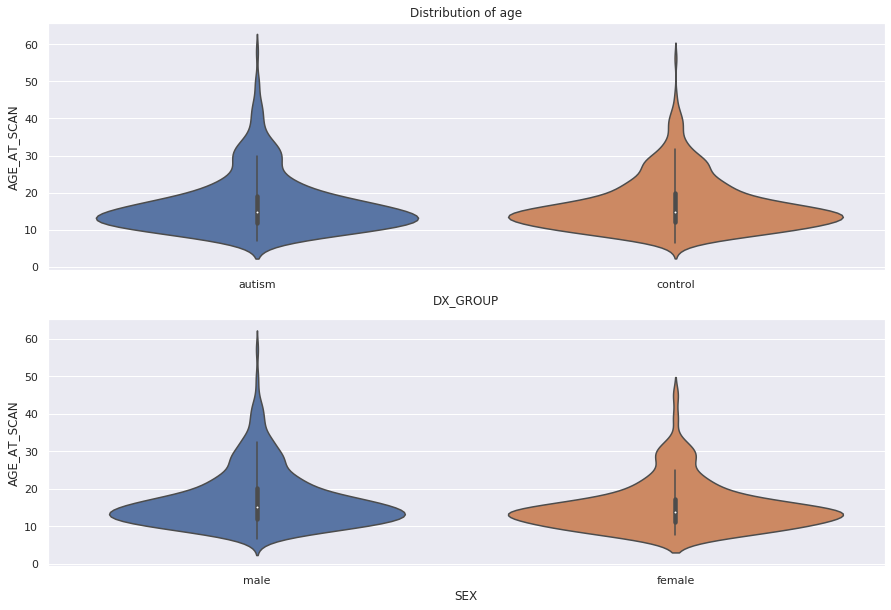

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15 , 10))

ax1 = plt.subplot(2,1,1) 
plt.title("Distribution of age")

sns.violinplot(x='DX_GROUP', 
            y = 'AGE_AT_SCAN',
            data = phen)

ax1 = plt.subplot(2,1,2) 
sns.violinplot(x='SEX', 
            y = 'AGE_AT_SCAN',
            data = phen)

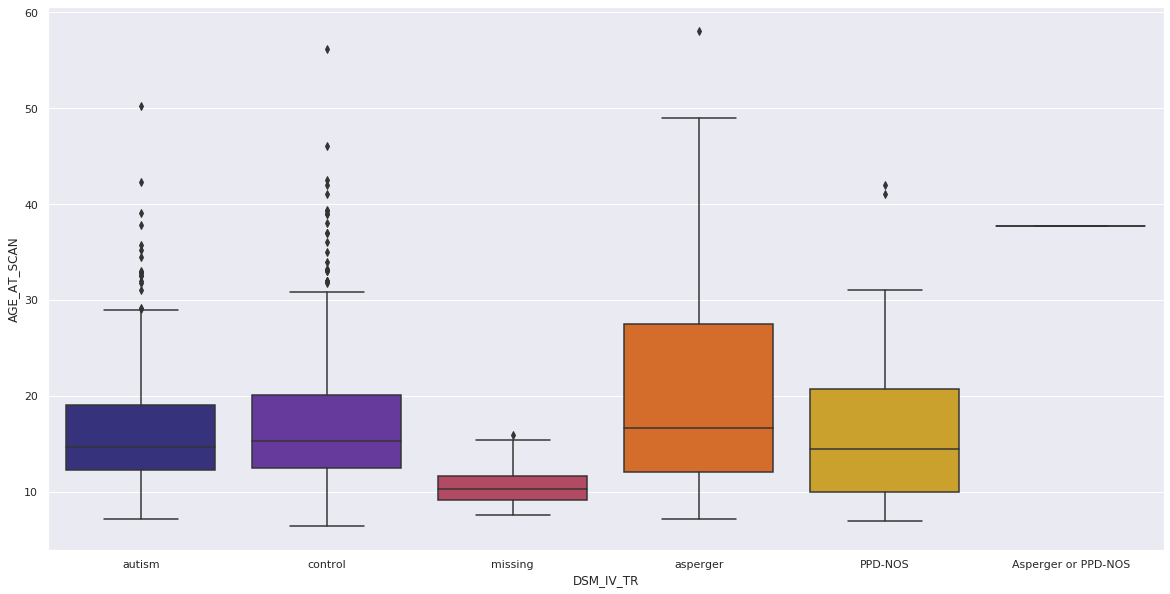

In [12]:
fig, ax = plt.subplots(figsize=(20 , 10))

sns.boxplot(x='DSM_IV_TR', 
            y = 'AGE_AT_SCAN',
            data = phen,
            palette = "CMRmap"
           )

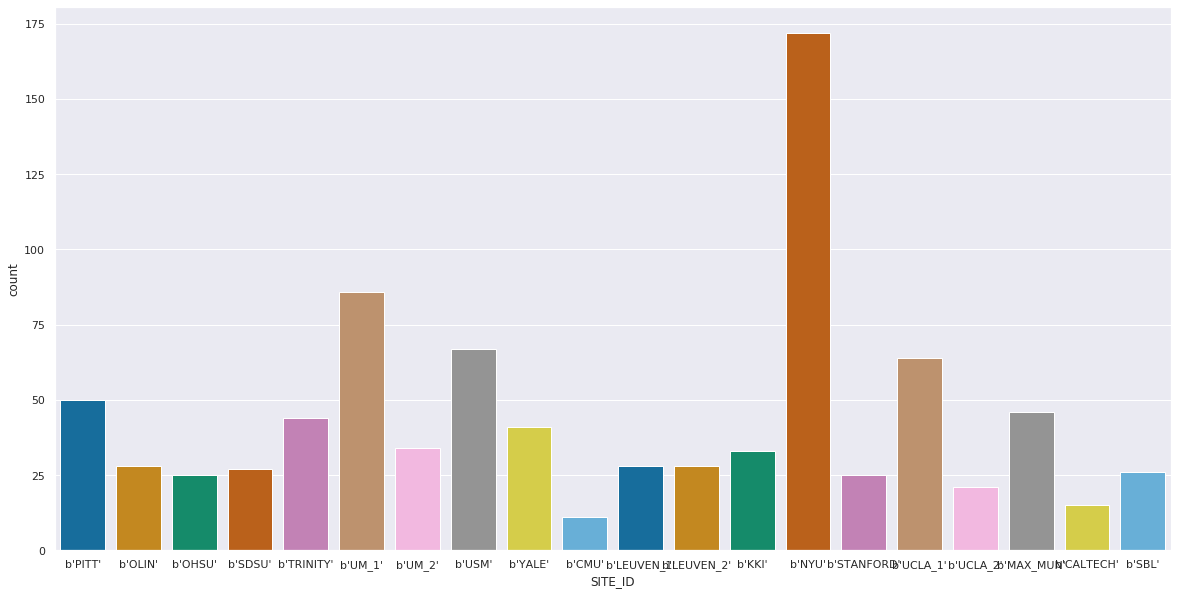

In [13]:
#Data on acquisition sites
fig, ax = plt.subplots(figsize=(20 , 10))
sns.countplot('SITE_ID', data=phen, palette="colorblind")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

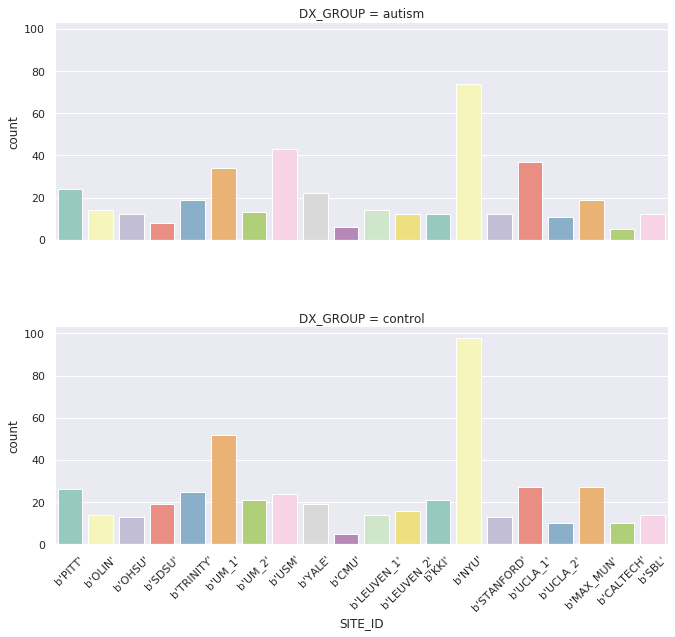

In [257]:
ax= sns.catplot(x="SITE_ID",
                data=phen, row="DX_GROUP", orient="h", height=2, aspect=3, palette="Set3",
                kind="count", dodge=True);

plt.gcf().set_size_inches(10, 10)
plt.xticks(rotation = 45)

# Data exploration with interactive plotting

In [14]:
#basic interactive plot
phen["SEX"].iplot(kind='hist', xTitle='Gender',
                  yTitle='Count', title='Count of f/m')

In [21]:
phen.pivot(columns=phen["AGE_AT_SCAN"], values=phen['SITE_ID']).iplot(
        kind='box',
        yTitle='AGE_AT_SCAN',
        title='age distribution according to site')

KeyError: "None of [Float64Index([24.45, 19.09, 13.73, 13.37, 17.78, 32.45,  35.2, 16.93, 21.48,\n               9.33,\n              ...\n               31.0,  33.0,  41.0,  42.0,  31.0,  35.0,  49.0,  27.0,  29.0,\n               26.0],\n             dtype='float64', length=871)] are in the [columns]"

In [28]:
#make value into dictionary
phen_grby= phen.groupby(phen["SITE_ID"])


In [32]:
trace1 = go.Bar(
                x = phen["SITE_ID"],
                y = phen["AGE_AT_SCAN"],
                name = "ZHVI_1bedroom",
                marker = dict(color = 'rgb(102,255,255)'),
                text = phen['SITE_ID'])

data = [trace1]
layout = go.Layout(barmode = "group", title="AGE...",
                   xaxis= dict(title= 'SITE',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'AGE',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
url = py.plot(fig, validate=False)

TypeError: Object of type bytes is not JSON serializable

In [ ]:
#Mean house values by Bedrooms type and year
trace1 = go.Bar(
                x = df_groupby_datebr.SITE_ID.values,
                y = df_groupby_datebr.AGE_aT_SCAN,
                name = "ZHVI_1bedroom",
                marker = dict(color = 'rgb(102,255,255)'),
                text = df_groupby_datebr['ZHVI_1bedroom'])
trace2 = go.Bar(
                x = df_groupby_datebr.index.values,
                y = df_groupby_datebr.ZHVI_2bedroom,
                name = "ZHVI_2bedroom",
                marker = dict(color = 'rgb(102,178,255)'),
                text = df_groupby_datebr['ZHVI_2bedroom'])
trace3 = go.Bar(
                x = df_groupby_datebr.index.values,
                y = df_groupby_datebr.ZHVI_3bedroom.values,
                name = "ZHVI_3bedroom",
                marker = dict(color = 'rgb(102,102,255)'),
                text = df_groupby_datebr['ZHVI_3bedroom'])
trace4 = go.Bar(
                x = df_groupby_datebr.index.values,
                y = df_groupby_datebr.ZHVI_4bedroom.values,
                name = "ZHVI_4bedroom",
                marker = dict(color = 'rgb(178, 102, 255)'),
                text = df_groupby_datebr['ZHVI_4bedroom'])
trace5 = go.Bar(
                x = df_groupby_datebr.index.values,
                y = df_groupby_datebr.ZHVI_5BedroomOrMore.values,
                name = "ZHVI_5BedroomOrMore",
                marker = dict(color = 'rgb(255, 102, 255)'),
                text = df_groupby_datebr['ZHVI_5BedroomOrMore'])
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(barmode = "group", title="Bar Chart: Mean House Values by Bedrooms and Year",
                   xaxis= dict(title= 'Year',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Mean House Values',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
url = py.plot(fig, validate=False)

DDEAL WITH MISSING DATA BEFORE GETTING INTO ML: EXCLUSION PARTICIPANT WITH MISSING DATA

In [60]:
#subset the features we are interested in

print(phen.shape)

phen_predict = phen[phen["DX_GROUP"]!="NaN"]
phen_predict.shape

#No missing data for DX_GROUP 

(871, 105)


(871, 105)

# Extracting the features (X) 

In [74]:
#fetch atlas for brain parcellation
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

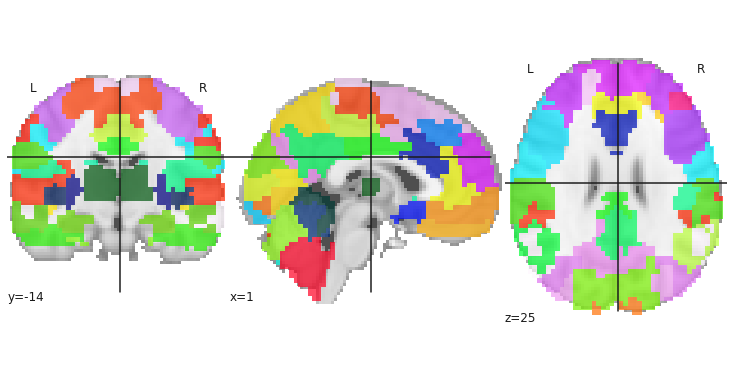

In [75]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=True)
plt.gcf().set_size_inches(10, 5)

Preprocessing to create connectome for 1 subject, than will be implemented for all 800.. subjects

In [76]:
fmri_filenames = data.func_preproc[100]
print(fmri_filenames)

/home/anproulx/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/OHSU_0050169_func_preproc.nii.gz


In [82]:
from nilearn import image
from nilearn.image import load_img
im= load_img(fmri_filenames)

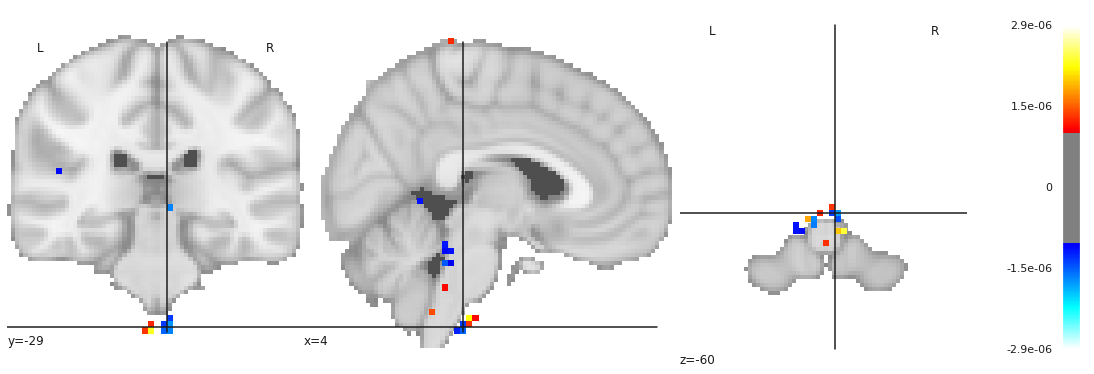

In [83]:
averaged_Img = image.mean_img(fmri_filenames)
plotting.plot_stat_map(averaged_Img)
plt.gcf().set_size_inches(15, 5)

In [84]:
#Extract features (what about the confounds?????)
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename, 
                           standardize=True, 
                           memory='nilearn_cache', 
                           verbose=1)

time_series = masker.fit_transform(fmri_filenames)

[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Resampling labels


In [85]:
time_series.shape

(78, 64)

In [86]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix.shape

(64, 64)

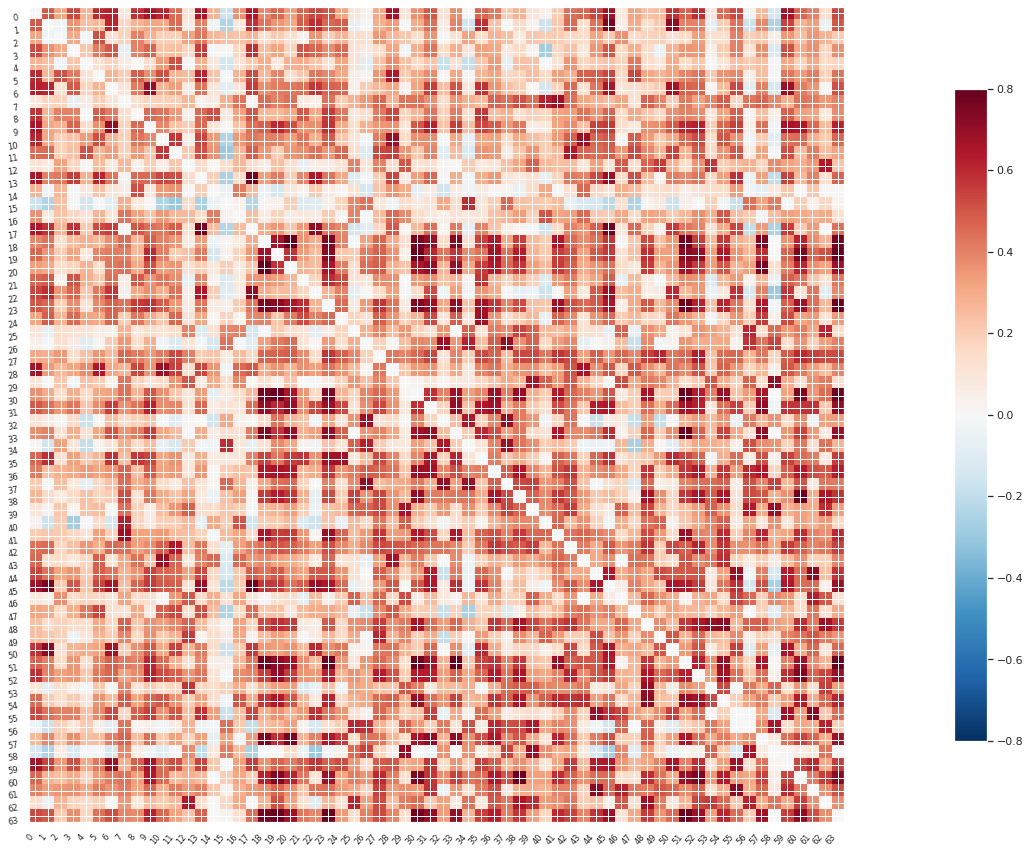

In [90]:
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, figure=(25, 15),   
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False) #reorder= True does clustering within the matrix

#remove grid

Extract features for ALL subjects: implement loop over funct_preproc files

In [ ]:
all_features = []

for i,sub in enumerate(data.func_preproc):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(sub)
    
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    
    # add to our container
    all_features.append(correlation_matrix)
    
    # keep track of status
    print('finished %s of %s'%(i+1,len(data.func_preproc)))

[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 1 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 2 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 3 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
finished 4 of 871
[NiftiLabelsMasker.fit_transform] loading data from /home/anproulx/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multisc

In [71]:
#Reshape individual connectome to 1 dimension (flat array)
for i in range (len(all_features)):
    #all_features[i]=np.triu(all_features[i])
    all_features[i]=all_features[i].flatten()
    print (all_features[i])
i=i+1

#save to lacal space
np.savez_compressed('MAIN_BASC064_subsamp_connectomes', a = all_features)

NameError: name 'all_features' is not defined

In [64]:
feat_file = 'MAIN_BASC064_subsamp_connectomes.npz'
X_features = np.load(feat_file)['a']

X_features.shape

#Since the matrix is symmetric, we only need to keep one half of the connectome!



(871, 4096)

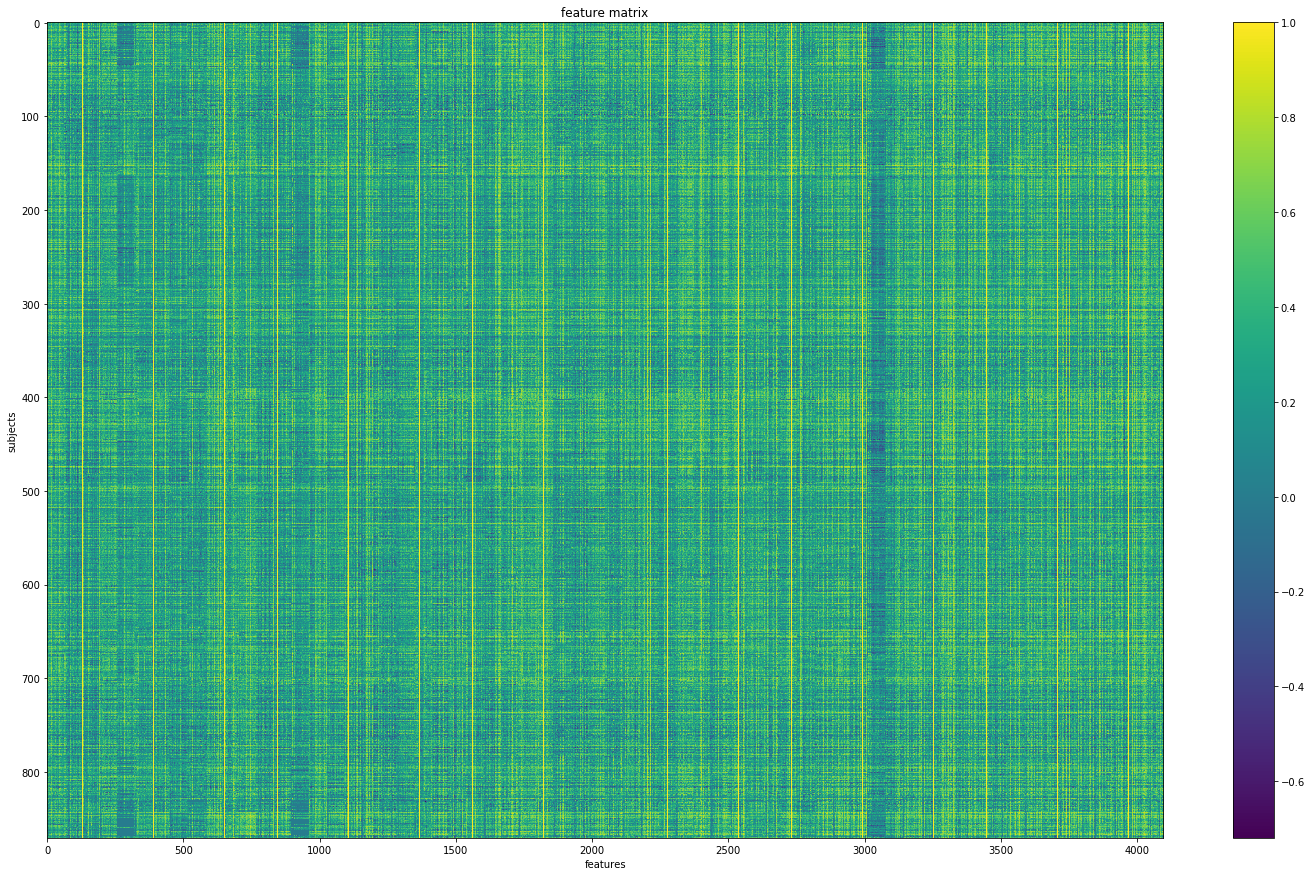

In [146]:
#plot feature matrix

import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

# Get the target vector (Y)

In [ ]:
y=phen[DX_GROUP]

In [61]:
#basic interactive plot
phen["DX_GROUP"].iplot(kind='hist', xTitle='Status',
                  yTitle='Count', title='Count of controls/autism subjects')

# Predicting labels: probabilistic and non-probabilistic classification models

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

# Dimensionality reduction with PCA

PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more. Using PCA for dimensionality reduction involves zeroing out one or more of the
smallest principal components, resulting in a lower-dimensional projection of the
data that preserves the maximal data variance.

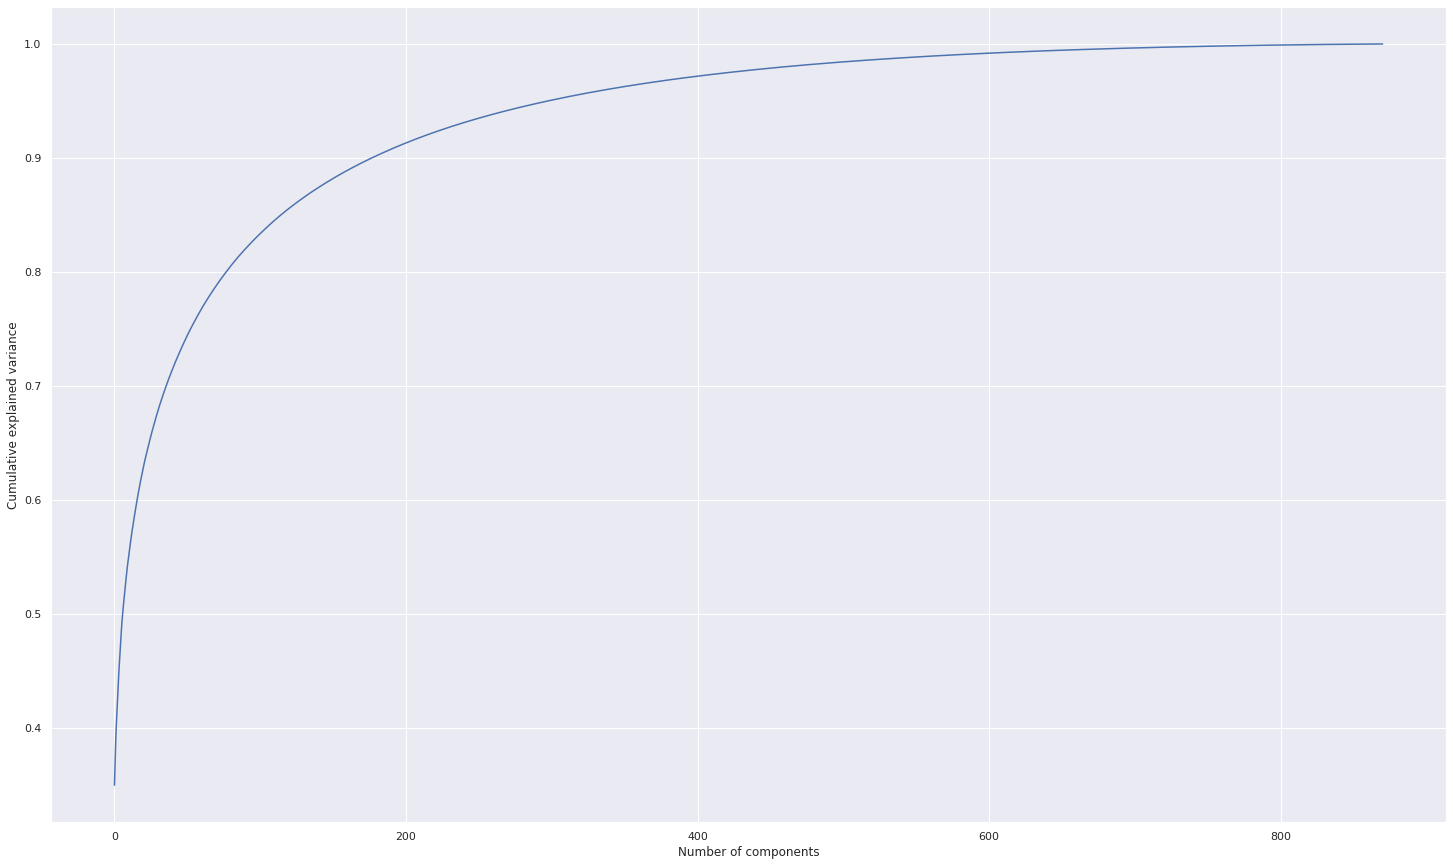

In [68]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.gcf().set_size_inches(25, 15)

#Around 800 components which is already 1296 less features!!!

In [70]:
from sklearn.decomposition import PCA
pca = PCA(800) #choose n components or variance you want to keep
pca.fit(X_features)
X_features_pca = pca.transform(X_features)


print("original shape: ", X_features.shape)
print("transformed shape:", X_features_pca.shape)

#print(pca.components_)

original shape:  (871, 4096)
transformed shape: (871, 800)


In [ ]:
ls_composantes = model.components_
forme_composantes = ls_composantes.shape
nr_composantes = forme_composantes[0]
print(forme_composantes)
variance_explique = model.explained_variance_ratio_


idx = []
for i in range(0,nr_composantes):
    idx.append('PC'+str(i))
print(pd.DataFrame(ls_composantes,columns=y,index = idx))


dic_comps = {'PC{}'.format(i): variance_explique[i] for i in range(len(variance_explique))}
df_comps = pd.DataFrame(dic_comps.values(), index = dic_comps.keys(), columns=['explained_variance'])

print(df_comps)

In [ ]:
# Extract most important features
most_important = [np.abs(ls_composantes[i]).argmax() for i in range(nr_composantes)]
most_important_names = [y[most_important[i]] for i in range(nr_composantes)]
dic_feat = {'PC{}'.format(i): most_important_names[i] for i in range(nr_composantes)}
df_feat = pd.DataFrame(dic_feat.values(), index = dic_feat.keys(), columns=['features'])

print(df_feat)

df_feat_comp = df_comps.join(df_feat, how="outer")
print(df_feat_comp)

SearchGrid & learning curves for choosing best hyperparameters 

In [ ]:
#Depicting learning curve according to training size and model complexity
from sklearn.learning_curve import learning_curve

train_score, val_score = validation_curve(SVC(), X_features, y,
'C', cv=10)

 # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

In [ ]:
#Using gridsearch to find best parameters
from sklearn.grid_search import GridSearchCV

param_grid = {#'polynomialfeatures__degree': np.arange(21),
#'linearregression__fit_intercept': [True, False],
#'linearregression__normalize': [True, False]}
grid = GridSearchCV(#PolynomialRegression(), param_grid, cv=7#)
    
grid.fit(X, y)
grid.best_params_
model = grid.best_estimator_

#plot
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

# Gaussian Naives Bayes

Information on the estimator: Proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.

*Source: Python Data Science Handbook

In [ ]:
from sklearn.naive_bayes import GaussianNB

#fit model to the data
model_GNB = GaussianNB()
model_GNB.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

yprob = model.predict_proba(Xnew) #gives the probabilistic prediction
yprob[-8:].round(2)

#Possible to do a multidimensional visualization???.... 2016 feat....prob not. 

# Support Vector Machines (SVM)

Discriminative classification: rather than modeling each class, we
simply find a line or curve (in two dimensions) or manifold (in multiple dimensions)
that divides the classes from each other. In support vector machines, the line that maximizes this margin is the one we will
choose as the optimal model. Support vector machines are an example of such a maximum
margin estimator.  Because they are affected only by points near the margin, they work well with
high-dimensional data—even data with more dimensions than samples, which is
a challenging regime for other algorithms.

C parameter: The hardness of the margin is controlled by a tuning parameter, most
often known as C. For very large C, the margin is hard, and points cannot lie in it. For
smaller C, the margin is softer, and can grow to encompass some points.

*Source Python Data Science Handbook

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

model.support_vectors_ #defining elements of the fit 

#Could also try out non-linear kernels, project to linear space, useful in the case of data non linearly seperable. 
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

# Decision Tree and Random forests

Random forests are an example of an ensemble learner built on decision trees. A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. 

Deepness of the tree: Going to deep in the levels of the tree can lead to overfitting the data. 

The key observation is that the inconsistencies
tend to happen where the classification is less certain, and thus by using
information from both of multiple trees, we might come up with a better result. That's where bagging methods, in this case Random Forests, comes into place. 

*Source: Python Data Science Handbook

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
random_state=1)
bag.fit(X, y)

ypred = bag.predict(X)

# KDE-based Bayesian classifier

# Comparing performance: Validation 

In [ ]:
#WAYS TO VALIDATE THE DATA

#split train-test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#MORE ACCURATE is cross validation : avoid overfitting for more complex/flexible models

#cross-validation choosing the nb of folds
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5) #cv is the number of folds


#cross-validation leave-one out -> see Abraham reference....
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

#In peer clinic: we talked about cross validating leaving one site out

How to increases the accuracy of estimators

Of core importance is the following question: if our estimator is underperforming, how
should we move forward? There are several possible answers:

• Use a more complicated/more flexible model
• Use a less complicated/less flexible model
• Gather more training samples
• Gather more data to add features to each sample

*Source Python Data Science Handbook

In [ ]:
#General questions: 
#1. No confounds for the ABIDE dataset? ... how will it affect the prediction. 
#2. Is it normal that I get mostly no activation for mean image. (and looks like it is in weird places). 
#3. Why don't I get negative correlation in the matrix....
#4. what would be the advantage of using fisher transform VS the pearson corr. 
#5. Time series shape are not all the same. (78, 64) (128, 64)
#6. nilearn.decoding.SearchLight... interesting to use????
#7. to be able to compare the performance, do we need to have same training-test set?? or if we all do cross-val, it will be ok?

#5. compare matrixes between teammates: the degree of overlapping. 
#6. make sure the images have been preprocessed in a standardise way, otherwise won't be possible to compare models. 

In [ ]:
#how number of subjects affect performances
#visualize matrixes in the form of a connectogram
#how should I visualize multidimensional data and their classifiers: make 3d plots

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize)

# Unsupervised machine learning  

Defining subclasses within the autism group: unsupervised estimators can highlight interesting aspects of the data
without reference to any known labels. 

# K-MEANS clustering, GMM...